# Lab 3: The $k$-nearest neighbors (KNN, $k$-NN) algorithm

Authors:
Joseph Salmon, Alexandre Gramfort, Claire Vernade, Mathurin Massias

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
from sklearn import neighbors
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from tp_knn_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)


import seaborn as sns
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

In [ ]:
##

In [2]:
############################################################################
#     Data Generation: example
############################################################################

np.random.seed(42)  # fix seed globally

X1, y1 = rand_bi_gauss(n1=20, n2=20)

X2, y2 = rand_tri_gauss(n1=50, n2=50, n3=50)

X3, y3 = rand_checkers(n1=50, n2=50)

X4, y4 = rand_clown(n1=150, n2=150)

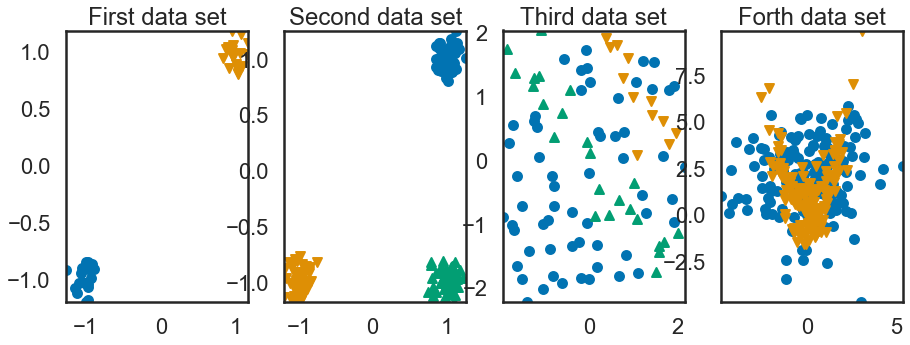

In [3]:
############################################################################
#     Displaying labeled data
############################################################################

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(X1, y1)

plt.subplot(142)
plt.title('Second data set')
plot_2d(X2, y2)

plt.subplot(143)
plt.title('Third data set')
plot_2d(X3, y3)

plt.subplot(144)
plt.title('Forth data set')
plot_2d(X4, y4)

In [10]:
############################################################################
#     K-NN
############################################################################

# Q2 : Write your own implementation

def get_n_last_items(array, n):
    return np.array(list(map(lambda a: a[-n:], array)))

class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        distances = metrics.pairwise_distances(X, self.X_)
        sorted_indices = np.argsort(distances)
        neighbors_indices = get_n_last_items(sorted_indices, self.n_neighbors)
        Y_neighbors = list(map(lambda x: self.y_[x], neighbors_indices))
        y_pred = list(map(stats.mode, Y_neighbors))
        y_pred = list(map(lambda x: x[0][0], y_pred))
        y_pred = np.array(y_pred)
        return y_pred

X_train = X2[::2]
Y_train = y2[::2]
X_test = X2[1::2]
Y_test = y2[1::2]

n_neighbors = 1
knn = KNNClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

sknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
sknn.fit(X_train, Y_train)
Y_pred_skl = knn.predict(X_test)

print(Y_pred == Y_pred_skl)

# From now on use the Scikit-Learn implementation
plt.ion()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


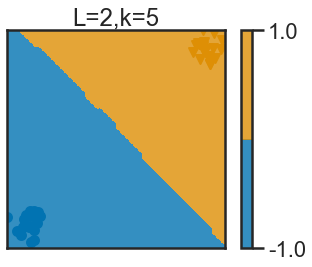

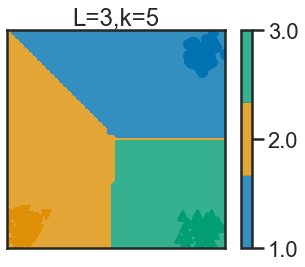

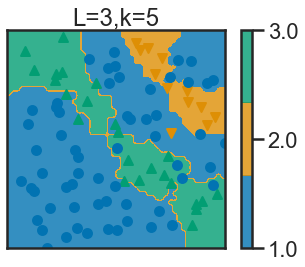

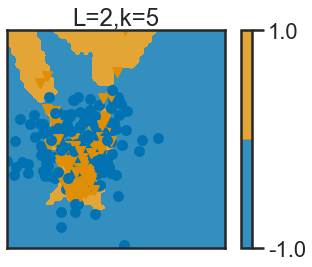

In [11]:
# Q3 : test now all datasets

n_neighbors = 5  # the k in k-NN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors) # todo
data = [
  [X1, y1],
  [X2, y2],
  [X3, y3],
  [X4, y4]
]

for X, y in data:
    plt.figure()
    knn.fit(X, y)
    n_labels = len(np.unique(y))
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1, n_labels=n_labels, n_neighbors=n_neighbors)

## Question 4.

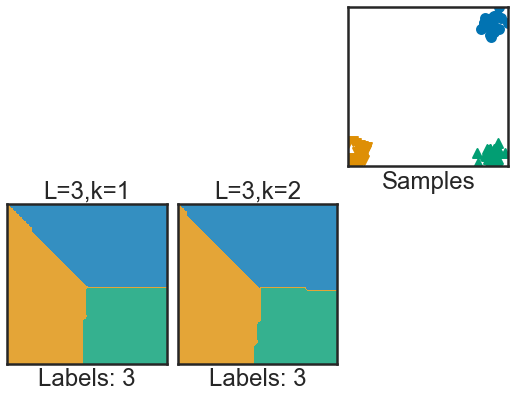

In [12]:
# Q4: Display the result when varying the value of K

plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 3)
plot_2d(X_train, Y_train)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for n_neighbors in range(1, len(np.unique(Y_train))):
    X, y = X_train, Y_train
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)
    plt.subplot(3, 5, 5 + n_neighbors)
    # todo put a label indicating the number of labels
    plt.xlabel('Labels: %i' % len(np.unique(Y_train)))
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1, colorbar=False, samples=False, n_neighbors=n_neighbors)
    plt.draw()  # update plot

plt.tight_layout()

The frontier seem more complicated when k is getting closer to the number of labels.

## Question 5.

[1. 3. 2. 2. 3. 2. 2. 2. 1. 3. 3. 2. 3. 1. 1. 3. 2. 1. 3. 1. 3. 2. 1. 1.
 3. 3. 1. 1. 3. 2. 3. 1. 3. 1. 2. 3. 2. 1. 2. 1. 3. 2. 3. 2. 2. 3. 3. 3.
 1. 1. 1. 2. 3. 2. 3. 3. 3. 2. 2. 3. 2. 1. 3. 2. 2. 3. 3. 1. 3. 3. 2. 2.
 1. 1. 1.]


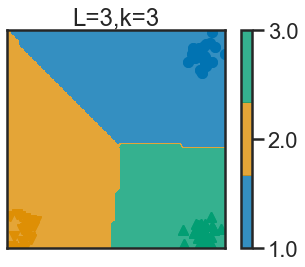

In [13]:
def weights(dist):
    """Returns an array of weights, exponentially decreasing in the square
    of the distance.

    Parameters
    ----------
    dist : a one-dimensional array of distances.

    Returns
    -------
    weight : array of the same size as dist
    """
    weight = np.exp(- dist ** 2 / 0.1)
    return weight

n_neighbors = 5
wknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
wknn.fit(X_train, Y_train)
plt.figure(4)
plot_2d(X_train, Y_train)

frontiere_new(knn, X_train, Y_train, w=None, step=50, alpha_choice=1)

print(wknn.predict(X_train))

In [14]:
n_neighbors = 1
wknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
wknn.fit(X_train, Y_train)
print(wknn.score(X_train, Y_train))
print(wknn.score(X_test, Y_test))

1.0
1.0


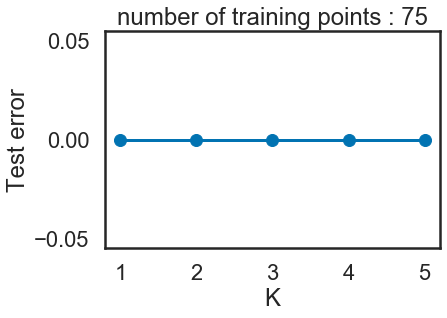

In [15]:
error_curve = ErrorCurve()
error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
error_curve.plot()